In [81]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import requests
import os
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [119]:
os.chdir("C:\\Users\\32493\\Google Drive\\ku leuven\\data analysis\\MDA\\CSV FILES")
os.getcwd()
df = pd.read_csv("Dataset_for_model.csv")
print(df.head)
print(df.info())

<bound method NDFrame.head of        agricultural sciences  engineering and technology  humanities  \
0                        0.0                         0.0         0.0   
1                        0.0                         0.0         2.0   
2                        1.0                         0.0         0.0   
3                        0.0                         0.0         0.0   
4                        0.0                         0.0         0.0   
...                      ...                         ...         ...   
15334                    0.0                         4.0         0.0   
15335                    0.0                         1.0         0.0   
15336                    0.0                         0.0         0.0   
15337                    0.0                         1.0         0.0   
15338                    0.0                         0.0         0.0   

       medical and health sciences  natural sciences  social sciences  \
0                              0

In [121]:
train[numeric_cols].corr()['ecMaxContribution'].sort_values(ascending=False)


ecMaxContribution              1.000000
contributors                   0.422429
duration                       0.202054
engineering and technology     0.039024
social sciences                0.030967
agricultural sciences          0.011894
natural sciences              -0.024251
medical and health sciences   -0.029030
humanities                    -0.060406
month                         -0.062499
Name: ecMaxContribution, dtype: float64

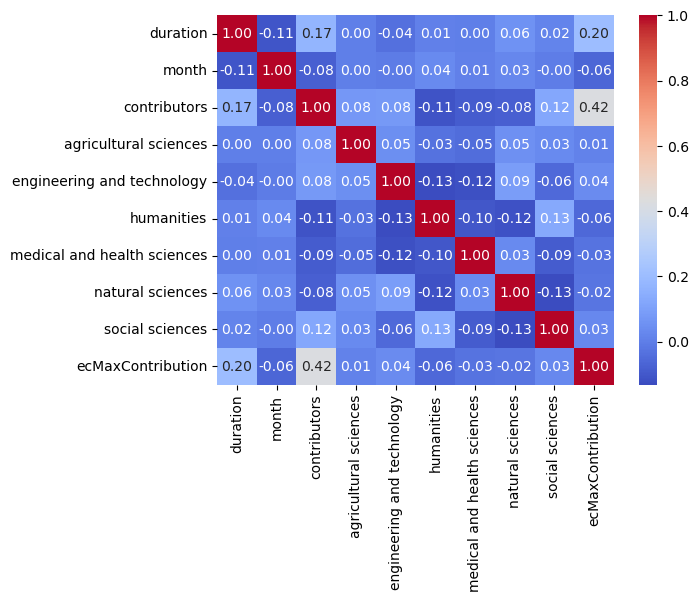

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check correlation with target
numeric_cols = num_features + ['ecMaxContribution']
sns.heatmap(train[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [125]:
df['engineering and technology'] = (df['engineering and technology'] > 0).astype(int)
df['agricultural sciences'] = (df['agricultural sciences'] > 0).astype(int)
df['humanities'] = (df['humanities'] > 0).astype(int)
df['medical and health sciences'] = (df['medical and health sciences'] > 0).astype(int)
df['natural sciences'] = (df['natural sciences'] > 0).astype(int)
df['social sciences'] = (df['social sciences'] > 0).astype(int)
print(df.head(n=10))

   agricultural sciences  engineering and technology  humanities  \
0                      0                           0           0   
1                      0                           0           1   
2                      1                           0           0   
3                      0                           0           0   
4                      0                           0           0   
5                      0                           1           0   
6                      0                           1           0   
7                      0                           0           0   
8                      0                           1           0   
9                      0                           0           0   

   medical and health sciences  natural sciences  social sciences  \
0                            0                 1                0   
1                            1                 1                0   
2                            0              

In [109]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

print("Baseline RMSE:", mean_squared_error(y_test, y_dummy, squared=False))
print("Baseline R²:", r2_score(y_test, y_dummy))

Baseline RMSE: 11786779.784067689
Baseline R²: -0.00031550081669218244


C:\Users\32493\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [127]:
science_cols = [
    'agricultural sciences',
    'engineering and technology',
    'humanities',
    'medical and health sciences',
    'natural sciences',
    'social sciences'
]


for col in science_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # turn 'NaN', ',', etc. into np.nan
    df[col] = df[col].fillna(0)  # replace real NaN with 0

In [141]:
# Preprocessing
num_features = ['duration', 'month', 'contributors', 
                'agricultural sciences', 'engineering and technology', 
                'humanities', 'medical and health sciences', 
                'natural sciences', 'social sciences']

cat_features = ['fundingScheme', 'country', 'activityType']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=43))  # or RandomForestRegressor()
])

# Split
train = df[df['split'] == 'train']
test = df[df['split'] == 'test']

X_train = train[num_features + cat_features]
y_train = train['ecMaxContribution']
X_test = test[num_features + cat_features]
y_test = test['ecMaxContribution']

'''
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Compute Windsorization thresholds from training set only
q05 = y_train.quantile(0.01)
q95 = y_train.quantile(0.99)


# Apply Windsorization
y_train_w = y_train.clip(lower=q05, upper=q95)
y_test_w = y_test.clip(lower=q05, upper=q95)
'''
# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 9156742.774265554
R² Score: 0.3962895569652982


C:\Users\32493\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
